In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
# !pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [2]:
df = pd.read_csv('../../../data/twitter/cleaned/final_clean_data.csv').drop('Unnamed: 0', axis=1)

print(df.shape)
df.head()

(66650, 10)


,date,hashtags,username,nlikes,nreplies,nretweets,search,clean_tweet4,year,month
0,2019-12-29 13:54:00,[],JesusDailyTwits,1,0,0,depression,best depression killer worshipping jesus try v...,2019,12
1,2019-12-29 12:47:00,[],Aluvrendar,67,3,6,depression,hope blessings majlis depression never return ...,2019,12
2,2019-12-29 12:33:00,[],mengwong,0,2,0,depression,feels like theory psychohistory ing together h...,2019,12
3,2019-12-28 18:33:00,[],haziqqqaaahzik,10,1,8,depression,post project depression cant believe days ende...,2019,12
4,2019-12-26 02:16:00,[],NASYRANN_,0,1,3,depression,depression thought,2019,12


### Remove tweets with these words as they are not relevent 

In [3]:
# Remove rows with these stopwords
search_words = ['nikerunning', 'dec', 'delavin',
                'kisses', 'agrunningmoms', 'migraineinsg',
                'jordan', 'munchausen', 'concert',
                'wspd', 'comedy', 'gentlemonstersunglasses', 
                'gentlemonster', 'youtube', 'star', 'place', 
                'comedy', 'poetry', 'want', 'know', 'diagrams', 
                'pared', 'owls', 'riser', 'street', 'style', 'buat',
                'phd', 'hi', 'im', 'gold', 'standard', 'yeah', 'watch', 
                'arena', 'things', 'teka', 'gt', 'matter', 'forex', 
                'zentrader', 'hospital', 'zerowaste', 'foodwaste', 
                'kangdaniel', 'danielk']

df = (df[~df['clean_tweet4'].str.contains('|'.join(search_words), na=False)]) #ignore NaN else the code breaks

df = df[~df['clean_tweet4'].isna()]

def remove_html_code(text):
    text = re.sub(r'\bamp\b\s+',"",text)
    return text

# To loop through and apply function
df['clean_tweet4'] = df['clean_tweet4'].apply(lambda x: remove_html_code(x))

In [4]:
# some keys to try: neg, neu, pos, compound. This is because VADER returns a dictionary so we use keys to extract
df['day'] = '01'
df['pos'] =  df['clean_tweet4'].apply(lambda x: analyser.polarity_scores(x)['pos'])
df['neu'] =  df['clean_tweet4'].apply(lambda x: analyser.polarity_scores(x)['neu'])
df['neg'] =  df['clean_tweet4'].apply(lambda x: analyser.polarity_scores(x)['neg'])
df['compound'] =  df['clean_tweet4'].apply(lambda x: analyser.polarity_scores(x)['compound'])

In [5]:
df_filtered = df[(df['year'] == 2020) & (df['month']== 3) |(df['month']== 4) |(df['month']== 5)]

/var/folders/hx/llk908mx5h77xg2bvkfqbhgm0000gn/T/ipykernel_3008/2497083387.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (df_filtered.groupby(['search'])


<AxesSubplot:xlabel='search'>

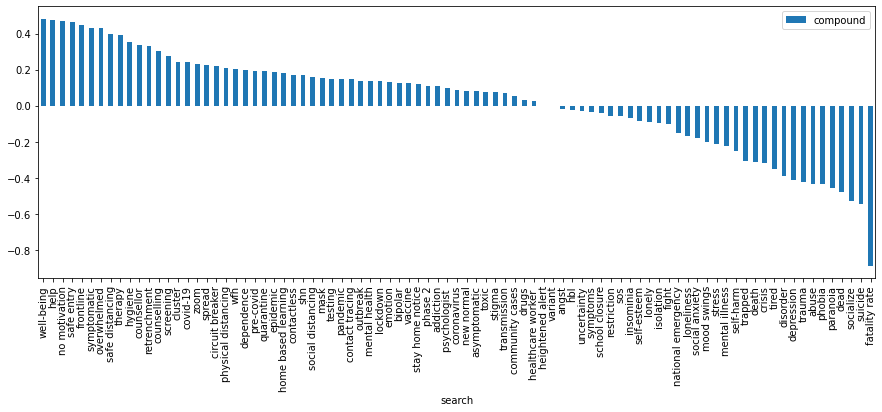

In [6]:
(df_filtered.groupby(['search'])
 ['pos','neu','neg','compound']
 .mean()
 .reset_index()
 .sort_values('compound', ascending=False).plot(kind='bar', 
                                                x='search', 
                                                y='compound',
                                                figsize=(15,5)))


In [7]:
df_grouped = df.groupby(['year', 'month','day'])[['pos','neu','neg','compound']].mean().reset_index()# .reset_index(name=['pos','neu','neg','compound'])

In [8]:
df_grouped.head()

,year,month,day,pos,neu,neg,compound
0,2019,1,01,0.165659,0.520186,0.314159,-0.147499
1,2019,2,01,0.163417,0.487834,0.348731,-0.178297
2,2019,3,01,0.138824,0.492169,0.368998,-0.199189
3,2019,4,01,0.155276,0.494372,0.350358,-0.190430
4,2019,5,01,0.165461,0.467084,0.367477,-0.155922


In [9]:
df_grouped['Datetime'] = pd.to_datetime(df_grouped[['year','month','day']])

In [10]:
df_grouped = df_grouped.set_index(df_grouped['Datetime'])

<Figure size 720x360 with 0 Axes>

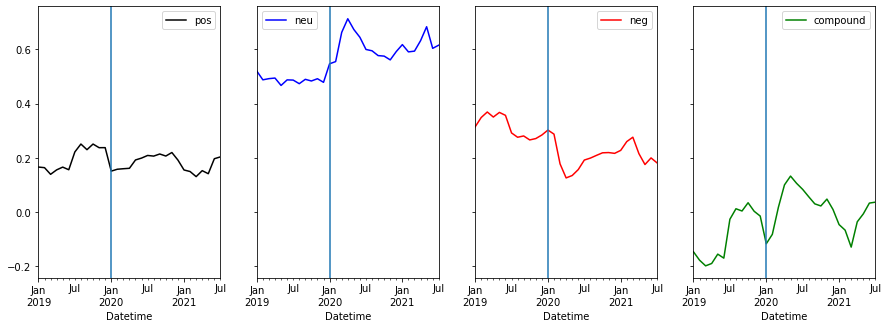

In [11]:
plt.figure(figsize=(10,5))

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15,5), sharey = True)
ax = ax.ravel()
df_grouped.plot(y='pos', use_index=True, ax=ax[0], color = 'black')
df_grouped.plot(y='neu', use_index=True, ax=ax[1], color = 'blue')
df_grouped.plot(y='neg', use_index=True, ax=ax[2], color = 'red')
df_grouped.plot(y='compound', use_index=True, ax=ax[3], color = 'green')

ax[0].axvline('2020-01-01')
ax[1].axvline('2020-01-01')
ax[2].axvline('2020-01-01')
ax[3].axvline('2020-01-01')
